<a href="https://colab.research.google.com/github/42jaylonw/five-English-word-GAN/blob/master/MOMO_Stock_Price_miqilin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import torch
import torch.nn as nn

import statsmodels.api as sm
from tqdm.notebook import tqdm

import pandas_datareader.data as web
from datetime import datetime

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Stock Data Download

In [ ]:
# get stocks daily data (OHLCV) from Yahoo
# the start date (e.g. 2017-01-01) & end date (e.g. 2020-12-31) for the period of interest

start = '2017' # accepts strings
end = datetime(2020, 12, 31) # or datetime objects

stock= web.DataReader('MOMO', 'yahoo', start=start, end=end)
stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,18.850000,18.230000,18.700001,18.299999,848200.0,17.383408
2017-01-04,19.260000,18.309999,18.309999,19.240000,2418000.0,18.276325
2017-01-05,20.700001,19.200001,19.290001,20.520000,2792600.0,19.492216
2017-01-06,20.600000,19.959999,20.600000,20.370001,1351300.0,19.349728
2017-01-09,21.299999,20.350000,20.389999,21.270000,1620600.0,20.204651
...,...,...,...,...,...,...
2020-12-24,13.420000,13.075000,13.400000,13.220000,2252100.0,13.220000
2020-12-28,13.300000,12.840000,13.210000,13.000000,3187100.0,13.000000
2020-12-29,13.650000,13.020000,13.020000,13.460000,3081600.0,13.460000


In [ ]:
# Save the stock dataframe to csv for downloading
stock.to_csv('MOMO.csv')

In [ ]:
from google.colab import files
files.download('MOMO.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Exploratory Data Analysis &  Data Visualization

In [ ]:
stock.shape

(1007, 6)

In [ ]:
stock.info() #all of them are numerical data and non-null

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2017-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1007 non-null   float64
 1   Low        1007 non-null   float64
 2   Open       1007 non-null   float64
 3   Close      1007 non-null   float64
 4   Volume     1007 non-null   float64
 5   Adj Close  1007 non-null   float64
dtypes: float64(6)
memory usage: 55.1 KB


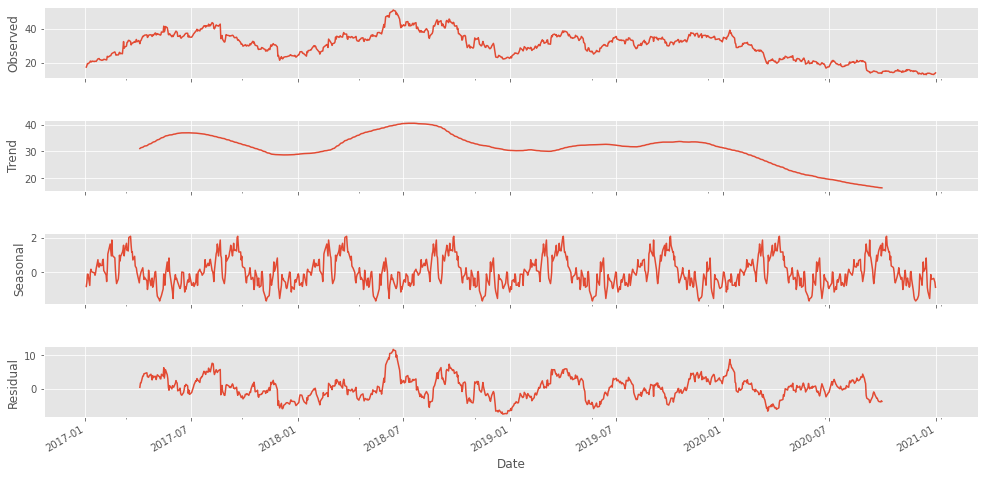

In [ ]:
# Display the decomposition of the time series into trend and seasonality components
time_series_data = sm.tsa.seasonal_decompose(stock['Adj Close'], freq=128)
fig = time_series_data.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

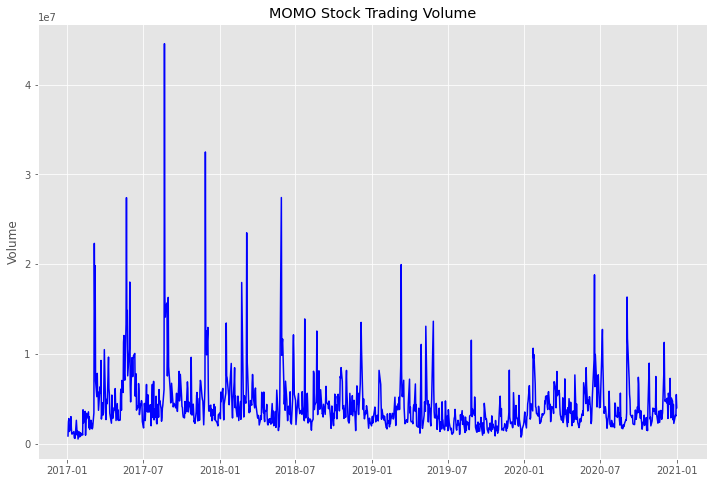

In [ ]:
# Plot the trading volume
plt.figure(figsize=(12,8))
plt.ylabel('Volume')
plt.xlabel(None)    # remove the label for the X-axis
plt.title('MOMO Stock Trading Volume')

plt.plot(stock['Volume'], c='blue')
plt.show() 

In [ ]:
!pip install mpl_finance
import mpl_finance as mpf

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

#input the days u want observe in k-line
days = 1007
# create ATVI price of open,close,high,low
opens = stock['Open'][0:days]
closes = stock['Close'][0:days]
highs = stock['High'][0:days]
lows = stock['Low'][0:days]

ohlc = list(zip(np.arange(0,len(opens)), opens, closes, highs, lows))

# k-line
mpf.candlestick2_ochl(ax, opens, closes, highs, lows, width=0.6, colorup='g', colordown='r') 
# x-axis
ax.set_xlim(0,days)
#set scale# and labels
ax.set_xticks(np.arange(0,days,5))


# set axis
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax.set_title('MOMO')
plt.show() 

# 3. MA of the Adjusted Closing Price

'''
It helps traders judge the trends that will occur and detect the trend that excessive growth is about to reverse. 
The most commonly used method of the moving average is to compare the relationship between the moving average of the securities price and the price of the securities themselves. 
When the price of a security rises above its moving average, a buy signal is generated. When the price of a security falls below its moving average, 
a sell signal is generated. 
'''

In [ ]:
#prepare a copy
stock2=stock

# Calculate the moving average
MA_20days = stock['Adj Close'].rolling(window=20).mean().dropna()
stock2['MA20']=MA_20days

# draw the Adj Close price and 20MA graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('MOMO Adj Close price')
stock2['Adj Close'].plot(legend = True,figsize = (10, 4))
stock2['MA20'].plot(legend = True,figsize = (10, 4))
plt.show() 

In [ ]:
#show MA5, MA20 & MA60 at the same time
MA_5days = stock['Adj Close'].rolling(window=5).mean().dropna()
MA_60days = stock['Adj Close'].rolling(window=10).mean().dropna()
stock2['MA5']=MA_5days
stock2['MA60']=MA_60days
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('MOMO MA')
stock2['Adj Close'].plot(legend = True,figsize = (10, 4))
stock2['MA5'].plot(legend = True,figsize = (10, 4))
stock2['MA20'].plot(legend = True,figsize = (10, 4))
stock2['MA60'].plot(legend = True,figsize = (10, 4))
plt.show() 

# 4. Daily Return

'''
Daily return can show the volatility better compare to price figure
'''

In [ ]:
R_1D = (stock['Close']-stock['Open'])/(stock['Open'])
stock2['R_1D']=R_1D

In [ ]:
nofig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Price Change')
stock2['R_1D'].plot(legend = True,figsize = (10, 4))
plt.show()

'''
the "ln" processing makes the data smoother and overcomes the heteroscedasticity of the data itself.It's better than R_1D
'''

In [ ]:
from numpy import log as ln

In [ ]:
lnR_1D = ln(stock['Close']/stock['Open'])

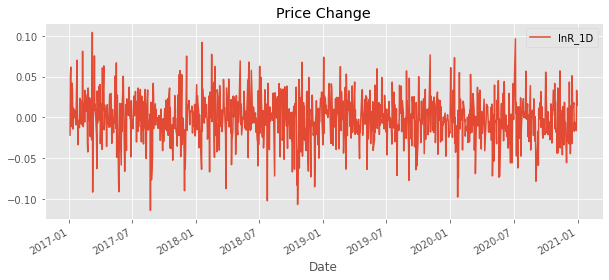

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Price Change')
stock2['lnR_1D']=lnR_1D
stock2['lnR_1D'].plot(legend = True,figsize = (10, 4))

In [ ]:
stock.to_csv('MOMO 2.0.csv')

In [ ]:
from google.colab import files
files.download('MOMO 2.0.csv')

# 5. Data Preprocessing

In [ ]:
stock.describe()

In [ ]:
#MA calculation caused the loss of data, and just delete na rows
stock=stock.dropna()

In [ ]:
# Generating a dataframe containing just the features
X_df = stock[['Open', 'High', 'Low', 'Volume','MA20','MA5','MA60','lnR_1D']]
X_df

In [ ]:
# Generating a 2-dimensional dataframe containing the target
Y_df = stock[['Adj Close']]
Y_df

# 6. Normalization on Features & Target

In [ ]:
# Normalized is advised for artificial neural networks
# Hence, the features are to be normalised [(]i.e. new = (old - mean)/standard_deviation]
#The difference between features are big, so standard methond is more suitable
normalizer = StandardScaler()
X_ar = normalizer.fit_transform(X_df)
X_ar

In [ ]:
# Unscaled target on regression problems can result in exploding gradients leading to failure
# Hence, the target is to be scaled
# Consequently, the prediction will need to be inverse-transformed
scaler = MinMaxScaler()
Y_ar = scaler.fit_transform(Y_df)
Y_ar

# Preparing Training and Test Datasets

In [ ]:
# Use the first 200 rows/samples for training and the rest for testing 
testing_percentage = 0.209
training_size = int(stock.shape[0] * (1 - testing_percentage))

In [ ]:
X_train_ar = X_ar [:training_size, :]
X_test_ar = X_ar [training_size:, :]

Y_train_ar = Y_ar [:training_size, :]
Y_test_ar = Y_ar [training_size:, :]

print ('Training Dataset Shape', X_train_ar.shape, Y_train_ar.shape)
print ('Testing Dataset Shape', X_test_ar.shape, Y_test_ar.shape)

# Transform to tensors

In [ ]:
input_size = 8   # number of features
hidden_size = 1   # number of hidden states
num_layers = 1   # number of LSTM layers
output_size = 1   # number of output classes 
batch_size = 1   # number of samples

In [ ]:
# Turning the training dataset into a tenro
X_train_tensor = torch.Tensor (X_train_ar)
Y_train_tensor = torch.Tensor (Y_train_ar)

# Turning the testing dataset into a tensor
X_test_tensor = torch.Tensor (X_test_ar)
Y_test_tensor = torch.Tensor (Y_test_ar)

print ('Training Dataset Shape: ', X_train_tensor.shape, Y_train_tensor.shape)
print ('Testing Dataset Shape: ', X_test_tensor.shape, Y_test_tensor.shape)

In [ ]:
# Returning a properly structured tensor with the following shape
# [Batch size, Sequence length, Number of features]

# New tensor containing the same data as the original input dataset of different shape

X_train_3D_tensor = torch.reshape(X_train_tensor, (batch_size, X_train_tensor.shape[0], X_train_tensor.shape[1]))
X_test_3D_tensor = torch.reshape(X_test_tensor, (batch_size, X_test_tensor.shape[0], X_test_tensor.shape[1]))

# Reshaping application to features only and not the target
print ('Training Shape: ', X_train_3D_tensor.shape, Y_train_tensor.shape)
print ('Testing Shape: ', X_test_3D_tensor.shape, Y_test_tensor.shape)

# Define our own LSTM RNN 

In [ ]:
# Define a be-spoken LSTM RNN 
# nn.Module is the superclass for all neural network modules

class LSTM1(nn.Module):
    
    # __init__ is invoked when a new instance of the class is created
    def __init__(self, output_size, input_size, hidden_size, num_layers, batch_size):

        super(LSTM1, self).__init__()   # Initiate the new instance using the __init__ method of the superclass
        
        self.num_classes = output_size   # Number of output classes, typically 1 for regression
        self.input_size = input_size   # Number of expected features in the input x
        self.hidden_size = hidden_size   # Number of features in the hidden state h 
        self.num_layers = num_layers   # Number of recurrent layers
        self.batch_size = batch_size   # Number of samples
                
        # Deploy the nn.LSTM as the RNN
        
        # Set batch_first=True to dictate the dimensions of the input tensor 
        # Input tensor as [batch_size, seq_len, input_size] instead of [seq_len. batch_size, input_size]
        
        # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        
        # nn.Linear takes the size of input and size of output as parameters
        # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.mlp_1 = nn.Linear(hidden_size, 128) # fully connected MLP layer connecting the LSTM layer
        self.mlp_2 = nn.Linear(128, output_size) # fully connected MLP layer producing the output
        
        # Use ReLU as the activation function
        # https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
        self.relu = nn.ReLU()
    
    # Define the forward propagation that takes the input tensor as input
    # input tensor (x) of shape [batch size, sequence length, no. of features]
    def forward(self, x):
        
        # the hidden state tensor and the cell state tensor are of the same shape
        # [no. of layers, batch size, hidden size]
        
        # Create two zero-valued tensors
        h_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)       
        c_0 = torch.zeros(self.num_layers, self.batch_size, self.hidden_size)
        
        # Propagate input through the LSTM using the zero-valued hidden and cell state tensors

        # The output includes the prediction tensor "output" having the shape [sequence length, batch size, hidden size]
        # and contains the output features (h_t) from the last layer of the LSTM
        
        # "h_n" corresponds to the hidden state for t=sequence length
        # "c_n" corresponds to the cell state  for t=sequence length
        
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        
        # flatten the output using a view such that each row represents the hidden state for each input row
        out = output.view(-1, self.hidden_size)

        # ensure values are all positive
        out = self.relu(out)   
        
        # Connect to the fully connected layers to generate the output
        out = self.mlp_1(out)
        out = self.relu(out)
        out = self.mlp_2(out)
        
        return out, (h_n, c_n)

# LSTM RNN Training

# Create LSTM RNN 

In [ ]:
num_epochs = 3000   # number of iterations
learning_rate = 0.001   # learning rate

In [ ]:
lstm1 = LSTM1(output_size, input_size, hidden_size, num_layers, batch_size)

In [ ]:
print(lstm1)

In [ ]:
MSE = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

# Train LSTM RNN 

In [ ]:
for epoch in tqdm(range(num_epochs), desc='LSTM RNN Training'):

    out, (h_n, c_n) = lstm1(X_train_3D_tensor)   # forward propagation
    
    loss = MSE(out, Y_train_tensor)   # obtain the loss based on MSE

    optimizer.zero_grad()   # clear the gradients before backward propagation
    loss.backward(retain_graph=True)   # backward propagation
    
    optimizer.step()   # improve from loss by updating all parameters
    
    if epoch % 100 == 99:
        print("Epoch: %d, loss: %1.5f" % (epoch+1, loss.item()))

# LSTM RNN Testing

In [ ]:
# Creating DataFrame storing actual and predicted values for visualization
Y = pd.DataFrame (index = Y_df.index, columns = ['Actual', 'Predicted'])

# Using the same date or time values as index
Y ['Actual'] = Y_df

# Performing prediction using trained LSTM RNN

In [ ]:
# Forward propagation on Training Dataset or Tensor
Y_train_pred, (h_n, c_n) = lstm1 (X_train_3D_tensor)

# Numpy conversion followed by reverse normalization
Y_train_pred_ar = scaler.inverse_transform (Y_train_pred.data.numpy())
Y.loc [Y.index [: training_size], 'Predicted'] = Y_train_pred_ar

In [ ]:
# Forward Propagation on Test Dataset or Tensor
Y_test_pred, (h_n, c_n) = lstm1 (X_test_3D_tensor)

# Numpy conversion followed by reverse normalization
Y_test_pred_ar = scaler.inverse_transform (Y_test_pred.data.numpy())
Y.loc [Y.index [training_size :], 'Predicted'] = Y_test_pred_ar

# Grid-Search

# Visualization of the result

In [ ]:
# Handle date/time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,8))   # plotting

plt.plot(Y.index.values, Y['Actual'], label='Actual Volume')   # actual plot
plt.plot(Y.index.values, Y['Predicted'], label='Predicted Volume')   # predicted plot
plt.title('Starbuck Stock Trading Volume')
plt.legend() 
plt.axvline(x=Y.index.values[781], c='r', linestyle='--')   # mark the boundary of training and test dataset
plt.show() 

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('RMSE/Mean (Training): {}'.format( \
    mean_squared_error(Y.loc[Y.index[:training_size], 'Actual'], Y.loc[Y.index[:training_size], 'Predicted'], \
    squared=False)/Y.loc[Y.index[:training_size], 'Actual'].mean()))
print('RMSE/Mean (Test): {}'.format( \
    mean_squared_error(Y.loc[Y.index[training_size:], 'Actual'], Y.loc[Y.index[training_size:], 'Predicted'], \
    squared=False)/Y.loc[Y.index[training_size:], 'Actual'].mean()))